<h1>Análise Exploratória de Dados de filmes e séries da Netflix</h1>
<p align='justify'>A <a href="https://www.netflix.com/br/">Netflix</a> é uma plataforma de serviço online de streaming norte-americano de mídia e vídeos sob demanda por assinatura (Over The Top - OTT) lançada em 2010 e disponível em mais de 190 países <cite><a href="https://pt.wikipedia.org/wiki/Netflix#cite_note-12">[Wikipedia]</a></cite>.</p>

<p align='justify'>Como premissa para as análises e organização do projeto, é utilizada a metodologia <a href="https://www.datascience-pm.com/crisp-dm-2/">Cross Industry Standard Process for Data Mining (CRISP-DM)</a>.</p>

<pre>
<strong>Sumário</strong>

<a href="#business_understanding">1 - Entendimento do Negócio</a>
<a href="#data_understanding">2 - Entendimento dos Dados</a>
<a href="#data_preparation">3 - Preparação dos Dados</a>
<a href="#eda">4 - Visualização dos Dados</a>
<a href="#deploy">5 - Deploy - Streamlit</a>
</pre>

<h2 id=business_understanding>Entendimento do Negócio</h2>
<p align='justify'>O conjunto de dados em análise, se refere a uma lista de filmes e séries disponíveis na Netflix, com informações por exemplo do elenco, diretores, classificações, ano de lançamento, duração, entre outras mais.</p>

<h3>Dicionário de dados</h3>
<p align='justify'>Abaixo é demonstrado os campos (colunas) e sua respectiva descrição a que se refere tal dado.</p>

|Campo|Descrição|
|:-|:-|
| show_id | ID exclusivo para cada filme / programa de TV (série) |
| type | Identificador de filme ou programa de TV (série) |
| title | Título do filme/programa de TV (série) |
| director | diretor do filme |
| cast | Atores envolvidos no filme/programa de TV (série) |
| country | País onde o filme/programa foi produzido |
| date_added | Data em que foi adicionado à Netflix |
| release_year | Ano de lançamento real do filme ou programa de TV (série) |
| rating | Classificação do filme/programa de TV (série) |
| duration | Duração Total - em minutos ou número de temporadas |
| listed_in | Gênero do filme/programa de TV (série) |
| description | Descrição do filme/programa de TV (série) |

<h2 id=data_understanding>Entendimento dos Dados</h2>
<p align='justify'>Nesta etapa é realizada a exploração dos dados, com o objetivo de entender as características da base de dados e possíveis ajustes necessários a serem realizados antes da etapa de visualização. Os dados estão disponíveis <a href="https://www.kaggle.com/datasets/shivamb/netflix-shows">neste link</a></p>

In [1]:
#!pip install wordcloud -q
# !pip install plotly -q

In [2]:
# Importando Bilbiotecas
import locale

# definir o locale para português do Brasil
locale.setlocale(locale.LC_TIME, 'pt_BR.utf8')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
# Apresenta os dados no notebook
%matplotlib inline

import seaborn as sns
# Estilo dos gráficos
sns.set_style("darkgrid")
sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True)
# Paleta de cores
paleta_netflix = ['#221f1f', '#b20710', '#e50914','#f5f5f1']
paleta_netflix_black = ['#000000', '#161616', '#2B2B2B', '#404040', '#575757']
paleta_netflix_red = ['#73050A', '#FF0A16', '#B20710', '#BF0811', '#99060D']

import plotly.express as px

from PIL import Image
from wordcloud import WordCloud

In [3]:
# Leitura dos dados
df = pd.read_csv("dados/netflix_titles.csv")

# Proporção dos dados em linhas e colunas
df.shape

(8807, 12)

In [4]:
# Verificando os metadados da base
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
# Verificando os tipos de dados.
print("Tipos de dados e sua frequência\n{}".format(df.dtypes.value_counts()))

Tipos de dados e sua frequência
object    11
int64      1
dtype: int64


In [6]:
# Observando a base de dados
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [7]:
# Verificação da existência de dados ausentes/faltantes
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [8]:
# Verificando dados nulos por registro e retornando a maior quantidade.
df.isna().sum(axis=1).max()

3

In [9]:
# Verificando a Estatística Básica dos dados numéricos.
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [10]:
# Verificando registros com 'director' ausente.
df.loc[df["director"].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
10,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B..."
14,s15,TV Show,Crime Stories: India Detectives,NaN,NaN,NaN,"September 22, 2021",2021,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Docuseries",Cameras following Bengaluru police on the job ...
...,...,...,...,...,...,...,...,...,...,...,...,...
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,NaN,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada","May 1, 2018",2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...
8796,s8797,TV Show,Yunus Emre,NaN,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,"January 17, 2017",2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves..."
8797,s8798,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia","September 13, 2018",2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...
8800,s8801,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."


In [11]:
# Verificando registros com 'cast' ausente.
df.loc[df["cast"].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
10,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B..."
14,s15,TV Show,Crime Stories: India Detectives,NaN,NaN,NaN,"September 22, 2021",2021,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Docuseries",Cameras following Bengaluru police on the job ...
16,s17,Movie,Europe's Most Dangerous Man: Otto Skorzeny in ...,"Pedro de Echave García, Pablo Azorín Williams",NaN,NaN,"September 22, 2021",2020,TV-MA,67 min,"Documentaries, International Movies",Declassified documents reveal the post-WWII li...
...,...,...,...,...,...,...,...,...,...,...,...,...
8746,s8747,Movie,Winnie,Pascale Lamche,NaN,"France, Netherlands, South Africa, Finland","February 26, 2018",2017,TV-14,85 min,"Documentaries, International Movies",Winnie Mandela speaks about her extraordinary ...
8755,s8756,TV Show,Women Behind Bars,NaN,NaN,United States,"November 1, 2016",2010,TV-14,3 Seasons,"Crime TV Shows, Docuseries",This reality series recounts true stories of w...
8756,s8757,Movie,Woodstock,Barak Goodman,NaN,United States,"August 13, 2019",2019,TV-MA,97 min,"Documentaries, Music & Musicals",For the 50th anniversary of the legendary Wood...
8763,s8764,Movie,WWII: Report from the Aleutians,John Huston,NaN,United States,"March 31, 2017",1943,TV-PG,45 min,Documentaries,Filmmaker John Huston narrates this Oscar-nomi...


In [12]:
# Verificando registros com 'country' ausente.
df.loc[df["country"].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
10,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8718,s8719,Movie,Westside vs. the World,Michael Fahey,"Ron Perlman, Louie Simmons",NaN,"August 9, 2019",2019,TV-MA,96 min,"Documentaries, Sports Movies",A look into the journey of influential strengt...
8759,s8760,Movie,World's Weirdest Homes,Storm Theunissen,Charlie Luxton,NaN,"February 1, 2019",2015,TV-PG,49 min,Movies,From a bubble-shaped palace to an island built...
8783,s8784,TV Show,Yoko,NaN,"Eileen Stevens, Alyson Leigh Rosenfeld, Sarah ...",NaN,"June 23, 2018",2016,TV-Y,1 Season,Kids' TV,"Friends Mai, Oto and Vik's games at the park b..."
8785,s8786,TV Show,YOM,NaN,"Sairaj, Devyani Dagaonkar, Ketan Singh, Mayur ...",NaN,"June 7, 2018",2016,TV-Y7,1 Season,Kids' TV,"With the mind of a human being, and the body o..."


In [13]:
# Verificando formato para a 'date_added' (data em que foi adicionado na Netflix)
df["date_added"][0:3]

0    September 25, 2021
1    September 24, 2021
2    September 24, 2021
Name: date_added, dtype: object

In [14]:
# Verificando a quantidade por tipo de filmes e duração. Para verificar formato da duração do filme entre minutos e temporadas.
df[["type", "duration", "show_id"]].groupby(by=["type", "duration"]).count()

show_id
type    duration          
Movie   10 min           1
        100 min        108
        101 min        116
        102 min        122
        103 min        114
...                    ...
TV Show 5 Seasons       65
        6 Seasons       33
        7 Seasons       23
        8 Seasons       17
        9 Seasons        9

[220 rows x 1 columns]

In [15]:
# Verificando o formato e a quantidade para os diretores
df["director"].value_counts()

Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        1
Name: director, Length: 4528, dtype: int64

In [16]:
# Verificando o formato e a quantidade para os atores
df["cast"].value_counts()

David Attenborough                                                                                                                                                                            19
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil                                                                                                       14
Samuel West                                                                                                                                                                                   10
Jeff Dunham                                                                                                                                                                                    7
David Spade, London Hughes, Fortune Feimster                                                                                                                                                   6
                                   

In [17]:
# Verificando o formato e a quantidade para a classificação indicativa
df["rating"].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

In [18]:
# Verificando o formato e a quantidade para a classificação do tema
df["listed_in"].value_counts()

Dramas, International Movies                          362
Documentaries                                         359
Stand-Up Comedy                                       334
Comedies, Dramas, International Movies                274
Dramas, Independent Movies, International Movies      252
                                                     ... 
Kids' TV, TV Action & Adventure, TV Dramas              1
TV Comedies, TV Dramas, TV Horror                       1
Children & Family Movies, Comedies, LGBTQ Movies        1
Kids' TV, Spanish-Language TV Shows, Teen TV Shows      1
Cult Movies, Dramas, Thrillers                          1
Name: listed_in, Length: 514, dtype: int64

In [19]:
# Verificando formato para a 'description' (descrição do filme e série)
print(df["description"][0], end="\n\n")
print(df["description"][1], end="\n\n")
print(df["description"][2])

As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable.

After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth.

To protect his family from a powerful drug lord, skilled thief Mehdi and his expert team of robbers are pulled into a violent and deadly turf war.


<h2 id=data_preparation>Preparação dos Dados</h2>
<p align='justify'>Nesta etapa é realizada a preparação dos dados, com o objetivo de ajustar as inconsistências encontradas durante a análise exploratória dos dados, permitindo que na etapa de visualização dos dados, os mesmos estejam de forma adequada a apresentação das informações.</p>

<h3>Ajustes necessários</h3>
<ul>
    <li>Correção no formato da data adicionada na Netflix (date_added).</li>
    <li>Criar coluna mês adicionada na Netflix a partir de (date_added).</li>
    <li>Criar coluna ano adicionada na Netflix a partir de (date_added).</li>
    <li>Correção do tipo para a duração (duration).</li>
    <li>Ajuste para o quantitativo de classificação indicativa (rating).</li>
    <li>Ajuste para o quantitativo de diretores (director).</li>
    <li>Ajuste para o quantitativo de atores (cast).</li>
    <li>Ajuste para o quantitativo de classificação do gênero (listed_in).</li>
    <li>Ajuste para o quantitativo por país (country).</li>
    <li>Segmentação entre filmes e séries.</li>
    <li>Quantitativo de diretores (director).</li>
    <li>Quantitativo de atores (cast).</li>
    <li>Quantitativo da classificação do gênero (listed_in).</li>
    <li>Quantitativo por país (country).</li>
    <li>Quantitativo por ano e mês adicionada na Netflix.</li>
    <li>Quantitativo por ano e mês de lançamento.</li>
</ul>

In [20]:
# Correção no formato da data adicionada na Netflix (date_added).
df["date_added_aux"] = pd.to_datetime(df['date_added'])

# Criar coluna mês adicionada na Netflix a partir de (date_added).
# mês numérico
df['month_added_num'] = df['date_added_aux'].dt.month.astype('Int64')
df['month_added_num'] = df['month_added_num'].fillna(np.nan)

# mês como carácter
df['month_added_char'] = df['date_added_aux'].dt.month.astype('Int64').astype(str)
df['month_added_char'].replace('<NA>', 'N/A', inplace  = True)

# nome do mês
df['month_name_added_char'] = df['date_added_aux'].dt.month_name().astype(str)
df['month_name_added_char'].replace('nan', 'N/A', inplace  = True)

# Criar coluna ano adicionada na Netflix a partir de (date_added).
# ano numérico
df['year_added_num'] = df['date_added_aux'].dt.year.astype('Int64')
df['year_added_num'] = df['year_added_num'].fillna(np.nan)

# ano como carácter
df['year_added_char'] = df['date_added_aux'].dt.year.astype('Int64').astype(str)
df['year_added_char'].replace('<NA>', 'N/A', inplace  = True)


print(f"Nome do mês: {list(df['month_name_added_char'].unique())}", end="\n\n")
print(f"Número do mês: {list(df['month_added_num'].unique())}", end="\n\n")
print(f"Ano: {list(df['year_added_num'].unique())}", end="\n\n")
print(f"Ano carácter: {list(df['year_added_char'].unique())}")

Nome do mês: ['September', 'August', 'July', 'June', 'May', 'April', 'March', 'February', 'January', 'December', 'November', 'October', 'N/A']

Número do mês: [9, 8, 7, 6, 5, 4, 3, 2, 1, 12, 11, 10, <NA>]

Ano: [2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2009, 2008, <NA>, 2010]

Ano carácter: ['2021', '2020', '2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011', '2009', '2008', 'N/A', '2010']


In [21]:
# Correção do tipo para a duração (duration).
df['duration_char'] = df['duration'].apply(lambda x: str(x).split(" ")[0])
df['duration_char'].replace('nan', 'N/A',inplace  = True)
df['duration_num'] = df['duration_char'].replace('N/A', np.nan).astype('Int64')

print(f"Tempo de Duração: {list(df['duration_num'].unique())[:10]}", end="\n\n")
print(f"Tempo de Duração em carácter: {list(df['duration_char'].unique())[:10]}")

Tempo de Duração: [90, 2, 1, 91, 125, 9, 104, 127, 4, 67]

Tempo de Duração em carácter: ['90', '2', '1', '91', '125', '9', '104', '127', '4', '67']


In [22]:
# Ajuste para o quantitativo de classificação indicativa (rating).
df['rating'] = df['rating'].astype(str)
df['rating'].replace('nan', 'N/A', inplace  = True)
df['rating'].replace('66 min', 'N/A', inplace  = True)
df['rating'].replace('74 min', 'N/A', inplace  = True)
df['rating'].replace('84 min', 'N/A', inplace  = True)

# Classificação Indicativa disponível em 'https://help.netflix.com/pt/node/2064/us'
class_indicative_desc = {'TV-MA':'Não recomendado para menores de 17 anos',
                         'TV-14':'Não recomendado para menores de 14 anos',
                         'TV-PG':'Orientação parental sugerida',
                         'R':'Restrito. Pode ser impróprio para menores de 17 anos',
                         'PG-13':'Pode ser impróprio para menores de 13 anos',
                         'TV-Y7':'Adequado para maiores de 7 anos',
                         'TV-Y':'Conteúdo infantil',
                         'PG':'Orientação parental sugerida',
                         'TV-G':'Adequado para o público em geral',
                         'NR':'Restrito. Pode ser impróprio para menores de 17 anos',
                         'G':'Adequado para o público em geral',
                         'N/A':'Sem Informação',
                         'TV-Y7-FV':'Não recomendado para menores de 7 anos com violência fantasiosa',
                         'NC-17':'Impróprio para menores de 17 anos',
                         'UR':'Não classificado'}

class_indicative_perfil = {'TV-MA':'Adults',
                           'TV-14':'Teens',
                           'TV-PG':'Kids',
                           'R':'Adults',
                           'PG-13':'Teens',
                           'TV-Y7':'Kids',
                           'TV-Y':'Kids',
                           'PG':'Kids',
                           'TV-G':'Kids',
                           'NR':'Adults',
                           'G':'Kids',
                           'N/A':'Sem Informação',
                           'TV-Y7-FV':'Kids',
                           'NC-17':'Adults',
                           'UR':'Não classificado'}

# Cria coluna de classificação indicativa descrição e perfil.
df["rating_desc"] = df["rating"].replace(class_indicative_desc)
df["rating_profile"] = df["rating"].replace(class_indicative_perfil)

print(f"Descrição: {list(df['rating_desc'].unique())[:10]}", end="\n\n")
print(f"Classificação por perfil: {list(df['rating_profile'].unique())[:10]}")

Descrição: ['Pode ser impróprio para menores de 13 anos', 'Não recomendado para menores de 17 anos', 'Orientação parental sugerida', 'Não recomendado para menores de 14 anos', 'Conteúdo infantil', 'Adequado para maiores de 7 anos', 'Restrito. Pode ser impróprio para menores de 17 anos', 'Adequado para o público em geral', 'Impróprio para menores de 17 anos', 'Sem Informação']

Classificação por perfil: ['Teens', 'Adults', 'Kids', 'Sem Informação', 'Não classificado']


In [23]:
# Ajuste para o quantitativo de diretores (director).
df['director'] = df['director'].astype(str)
df['director'].replace('nan', 'N/A', inplace  = True)

In [24]:
# Ajuste para o quantitativo de atores (cast).
df['cast'] = df['cast'].astype(str)
df['cast'].replace('nan', 'N/A', inplace  = True)

In [25]:
# Ajuste para o quantitativo da classificação do gênero (listed_in).
df['listed_in'] = df['listed_in'].astype(str)
df['listed_in'].replace('nan', 'N/A', inplace  = True)

In [26]:
# Ajuste para o quantitativo por país (country)
df['country'] = df['country'].astype(str)
df['country'].replace('nan', 'N/A', inplace  = True)
df['country'] = df['country'].str.lstrip()
df['country'] = df['country'].str.strip()

In [27]:
# Segmentação entre filmes e séries.
# Filmes
df_filmes = df.loc[df["type"] == "Movie"]
print(f"Filmes: {df_filmes.shape}")

# Séries
df_series = df.loc[df["type"] != "Movie"]
print(f"Séries: {df_series.shape}")

Filmes: (6131, 22)
Séries: (2676, 22)


In [28]:
# Quantitativo de diretores (director).
# Filmes
filmes_qtd_diretor = df_filmes['director'].str.get_dummies(', ').sum()

df_filmes_qtd_diretor = pd.DataFrame({'diretor':filmes_qtd_diretor.index, 'qtd':filmes_qtd_diretor.values}).sort_values(by="qtd", ascending=False, ignore_index=True)
df_filmes_qtd_diretor.insert(0, "type", "Movie")

# Séries
series_qtd_diretor = df_series['director'].str.get_dummies(', ').sum()

df_series_qtd_diretor = pd.DataFrame({'diretor':series_qtd_diretor.index, 'qtd':series_qtd_diretor.values}).sort_values(by="qtd", ascending=False, ignore_index=True)
df_series_qtd_diretor.insert(0, "type", "TV Show")

df_qtd_diretor = pd.concat([df_filmes_qtd_diretor, df_series_qtd_diretor], ignore_index=True)
df_qtd_diretor

,type,diretor,qtd
0,Movie,N/A,188
1,Movie,Rajiv Chilaka,22
2,Movie,Jan Suter,21
3,Movie,Raúl Campos,19
4,Movie,Suhas Kadav,16
...,...,...,...
5073,TV Show,Houda Benyamina,1
5074,TV Show,Hong Won-ki,1
5075,TV Show,Hiroyuki Seshita,1
5076,TV Show,Hikaru Toda,1


In [29]:
# Quantitativo de atores (cast).
# Filmes
filmes_qtd_ator = df_filmes['cast'].str.get_dummies(', ').sum()

df_filmes_qtd_ator = pd.DataFrame({'ator':filmes_qtd_ator.index, 'qtd':filmes_qtd_ator.values}).sort_values(by="qtd", ascending=False, ignore_index=True)
df_filmes_qtd_ator.insert(0, "type", "Movie")

# Séries
series_qtd_ator = df_series['cast'].str.get_dummies(', ').sum()

df_series_qtd_ator = pd.DataFrame({'ator':series_qtd_ator.index, 'qtd':series_qtd_ator.values}).sort_values(by="qtd", ascending=False, ignore_index=True)
df_series_qtd_ator.insert(0, "type", "TV Show")

df_qtd_ator = pd.concat([df_filmes_qtd_ator, df_series_qtd_ator], ignore_index=True)
df_qtd_ator

,type,ator,qtd
0,Movie,N/A,475
1,Movie,Anupam Kher,42
2,Movie,Shah Rukh Khan,35
3,Movie,Naseeruddin Shah,32
4,Movie,Om Puri,30
...,...,...,...
40811,TV Show,Ivy Yin,1
40812,TV Show,Iván Pellicer,1
40813,TV Show,Iván Álvarez de Araya,1
40814,TV Show,Iza Moreira,1


In [30]:
# Quantitativo da classificação do gênero (listed_in).
# Filmes
filmes_qtd_genero = df_filmes['listed_in'].str.get_dummies(', ').sum()

df_filmes_qtd_genero = pd.DataFrame({'genero':filmes_qtd_genero.index, 'qtd':filmes_qtd_genero.values}).sort_values(by="qtd", ascending=False, ignore_index=True)
df_filmes_qtd_genero.insert(0, "type", "Movie")

# Séries
series_qtd_genero = df_series['listed_in'].str.get_dummies(', ').sum()

df_series_qtd_genero = pd.DataFrame({'genero':series_qtd_genero.index, 'qtd':series_qtd_genero.values}).sort_values(by="qtd", ascending=False, ignore_index=True)
df_series_qtd_genero.insert(0, "type", "TV Show")

df_qtd_genero = pd.concat([df_filmes_qtd_genero, df_series_qtd_genero], ignore_index=True)
df_qtd_genero

,type,genero,qtd
0,Movie,International Movies,2752
1,Movie,Dramas,2427
2,Movie,Comedies,1674
3,Movie,Documentaries,869
4,Movie,Action & Adventure,859
5,Movie,Independent Movies,756
6,Movie,Children & Family Movies,641
7,Movie,Romantic Movies,616
8,Movie,Thrillers,577
9,Movie,Music & Musicals,375


In [31]:
# Quantitativo por país (country).
# Filmes
filmes_qtd_pais = df_filmes['country'].str.get_dummies(', ').sum()

df_filmes_qtd_pais = pd.DataFrame({'country':filmes_qtd_pais.index, 'qtd':filmes_qtd_pais.values}).sort_values(by="qtd", ascending=False, ignore_index=True)
df_filmes_qtd_pais.insert(0, "type", "Movie")

# Séries
series_qtd_pais = df_series['country'].str.get_dummies(', ').sum()

df_series_qtd_pais = pd.DataFrame({'country':series_qtd_pais.index, 'qtd':series_qtd_pais.values}).sort_values(by="qtd", ascending=False, ignore_index=True)
df_series_qtd_pais.insert(0, "type", "TV Show")

df_qtd_pais = pd.concat([df_filmes_qtd_pais, df_series_qtd_pais], ignore_index=True)
df_qtd_pais

,type,country,qtd
0,Movie,United States,2751
1,Movie,India,962
2,Movie,United Kingdom,532
3,Movie,N/A,440
4,Movie,Canada,319
...,...,...,...
183,TV Show,Switzerland,1
184,TV Show,Hungary,1
185,TV Show,Malta,1
186,TV Show,Mauritius,1


In [32]:
# Quantitativo por ano e mês adicionada na Netflix.
df_qtd_ano_mes_added = df.groupby(by=['type', 'year_added_num', 'year_added_char', 'month_added_char', 'month_name_added_char'], as_index=False)['show_id'].count()
df_qtd_ano_mes_added.rename(columns={'show_id':'qtd'}, inplace=True)
df_qtd_ano_mes_added

,type,year_added_num,year_added_char,month_added_char,month_name_added_char,qtd
0,Movie,2008,2008,1,January,1
1,Movie,2009,2009,11,November,1
2,Movie,2009,2009,5,May,1
3,Movie,2010,2010,11,November,1
4,Movie,2011,2011,10,October,11
...,...,...,...,...,...,...
188,TV Show,2021,2021,5,May,38
189,TV Show,2021,2021,6,June,83
190,TV Show,2021,2021,7,July,88
191,TV Show,2021,2021,8,August,61


In [192]:
# # Gero um dicionário para substituir os campos de home_ownership, addr_state e purpose.
def nome_mes(mes):
  mapping_dict1 = {
        "1": "01-JAN",
        "2": "02-FEV",
        "3": "03-MAR", 
        "4": "04-ABR", 
        "5": "05-MAI", 
        "6": "06-JUN",
        "7": "07-JUL",
        "8": "08-AGO",
        "9": "09-SET",
        "10": "10-OUT",
        "11": "11-NOV",
        "12": "12-DEZ"}
  return mapping_dict1[mes]

df_qtd_ano_mes_added['nome_mes_extracao'] = df_qtd_ano_mes_added["month_added_char"].apply(nome_mes)
df_qtd_ano_mes_added

,type,year_added_num,year_added_char,month_added_char,month_name_added_char,qtd,nome_mes_extracao
0,Movie,2008,2008,1,January,1,01-JAN
1,Movie,2009,2009,11,November,1,11-NOV
2,Movie,2009,2009,5,May,1,05-MAI
3,Movie,2010,2010,11,November,1,11-NOV
4,Movie,2011,2011,10,October,11,10-OUT
...,...,...,...,...,...,...,...
188,TV Show,2021,2021,5,May,38,05-MAI
189,TV Show,2021,2021,6,June,83,06-JUN
190,TV Show,2021,2021,7,July,88,07-JUL
191,TV Show,2021,2021,8,August,61,08-AGO


In [211]:
df_qtd_ano_mes_added_filmes = df_qtd_ano_mes_added.loc[df_qtd_ano_mes_added["type"] == "Movie"]
df_qtd_ano_mes_added_filmes = pd.pivot_table(data=df_qtd_ano_mes_added_filmes, values="qtd", index=["nome_mes_extracao"], columns=["year_added_char"], aggfunc=np.sum, fill_value=0)
df_qtd_ano_mes_added_filmes.sort_index()

year_added_char,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
nome_mes_extracao,,,,,,,,,,,,,,
01-JAN,1,0,0,0,0,0,2,1,15,58,105,116,152,96
02-FEV,0,0,0,0,1,0,1,3,9,65,63,103,72,65
03-MAR,0,0,0,0,0,0,0,3,14,87,138,119,93,75
04-ABR,0,0,0,0,0,0,1,1,14,66,87,119,127,135
05-MAI,0,1,0,1,0,0,0,5,9,63,70,91,105,94
06-JUN,0,0,0,0,0,0,1,4,11,65,50,122,115,124
07-JUL,0,0,0,0,0,0,1,5,19,45,125,98,103,169
08-AGO,0,0,0,0,0,0,1,2,23,77,130,87,82,117
09-SET,0,0,0,1,0,1,1,6,29,81,81,86,115,118


In [212]:
df_qtd_ano_mes_added_series = df_qtd_ano_mes_added.loc[df_qtd_ano_mes_added["type"] != "Movie"]
df_qtd_ano_mes_added_series = pd.pivot_table(data=df_qtd_ano_mes_added_series, values="qtd", index=["nome_mes_extracao"], columns=["year_added_char"], aggfunc=np.sum, fill_value=0)
df_qtd_ano_mes_added_series.sort_index()

year_added_char,2008,2013,2014,2015,2016,2017,2018,2019,2020,2021
nome_mes_extracao,,,,,,,,,,
01-JAN,0,0,0,0,28,14,24,37,53,36
02-FEV,1,0,1,1,6,17,24,45,42,44
03-MAR,0,1,0,2,3,38,35,53,44,37
04-ABR,0,0,1,4,8,27,28,43,50,53
05-MAI,0,0,0,1,4,23,27,48,52,38
06-JUN,0,0,0,2,7,29,28,46,41,83
07-JUL,0,0,0,2,9,34,27,59,43,88
08-AGO,0,1,0,0,11,38,34,44,47,61
09-SET,0,1,0,1,19,32,43,37,53,65


In [33]:
# Quantitativo por ano e mês de lançamento.
df_qtd_ano_mes_release_year = df.groupby(by=['type', 'release_year'], as_index=False)['show_id'].count()
df_qtd_ano_mes_release_year.rename(columns={'show_id':'qtd'}, inplace=True)
df_qtd_ano_mes_release_year

,type,release_year,qtd
0,Movie,1942,2
1,Movie,1943,3
2,Movie,1944,3
3,Movie,1945,3
4,Movie,1946,1
...,...,...,...
114,TV Show,2017,265
115,TV Show,2018,380
116,TV Show,2019,397
117,TV Show,2020,436


<h2 id=eda>Visualização de Dados</h2>
<p align='justify'>Nesta etapa é realizada a visualização de dados, com o objetivo de demonstrar os insights da bae de dados, e visualização das informações dispostas na mesma.</p>

- Proporção por tipo?
- Proporção por ano de lançamento e tipo?
- Proporção por ano adicionado e tipo?
- Proporção por ano, mês adicionado e tipo?
- Quais são as séries mais atuais e as mais antigas?
- Qual filme e série possuem maior duração de tempo?
- Qual classificação de filme ou série aparece mais?
- Qual o país com a maior quantidade de filmes e séries?

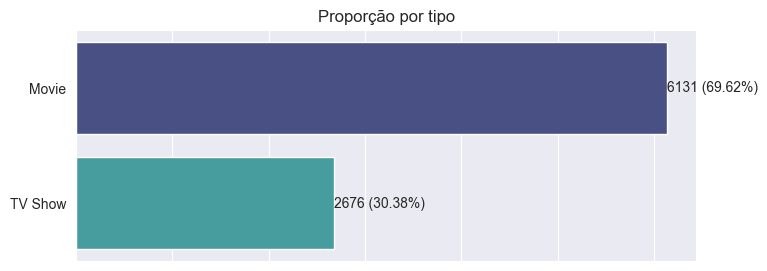

In [216]:
# Proporção por tipo
plt.figure(figsize=(8,3))
ax = sns.countplot(data=df, y='type',
                   order=df['type'].value_counts(ascending=False).index,
                   palette="mako")

type_values = df['type'].value_counts(ascending=False).values
type_perc_values = df['type'].value_counts(ascending=False, normalize=True).values * 100
type_labels = [f'{value[0]} ({value[1]:1.2f}%)' for value in zip(type_values, type_perc_values)]
ax.bar_label(container=ax.containers[0], labels=type_labels)

plt.title("Proporção por tipo")
plt.xlabel(None)
plt.ylabel(None)
ax.set(xticklabels=[])
plt.show()

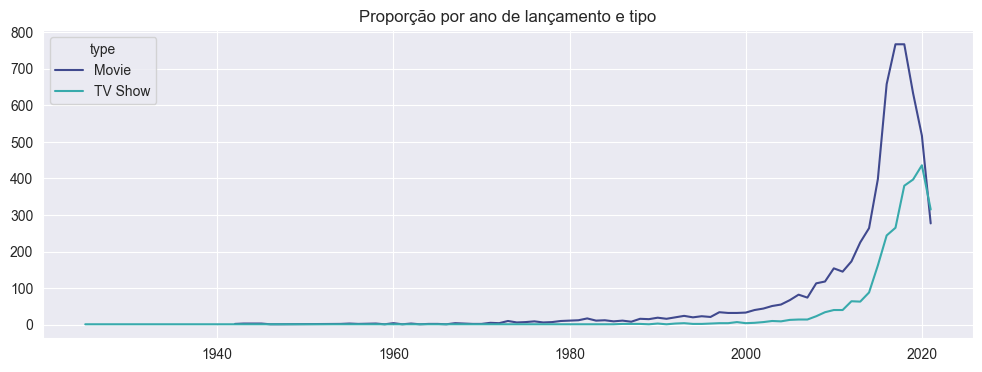

In [215]:
# Proporção por ano de lançamento e tipo
plt.figure(figsize=(12,4))
sns.lineplot(data=df_qtd_ano_mes_release_year, 
            x='release_year', 
            y='qtd',
            hue='type',
           palette="mako")
plt.title("Proporção por ano de lançamento e tipo")
plt.xlabel(None)
plt.ylabel(None)
plt.show()

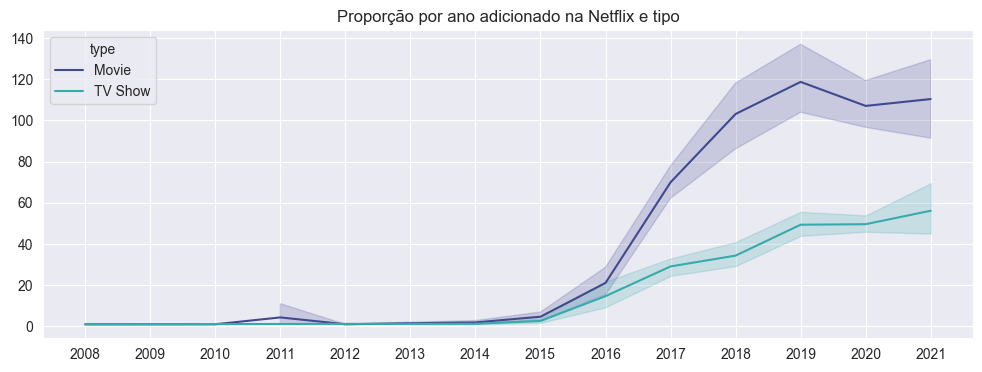

In [217]:
# Proporção por ano adicionado e tipo
plt.figure(figsize=(12,4))
sns.lineplot(data=df_qtd_ano_mes_added, x='year_added_char', y='qtd', hue='type', palette="mako")
plt.title("Proporção por ano adicionado na Netflix e tipo")
plt.xlabel(None)
plt.ylabel(None)
plt.show()

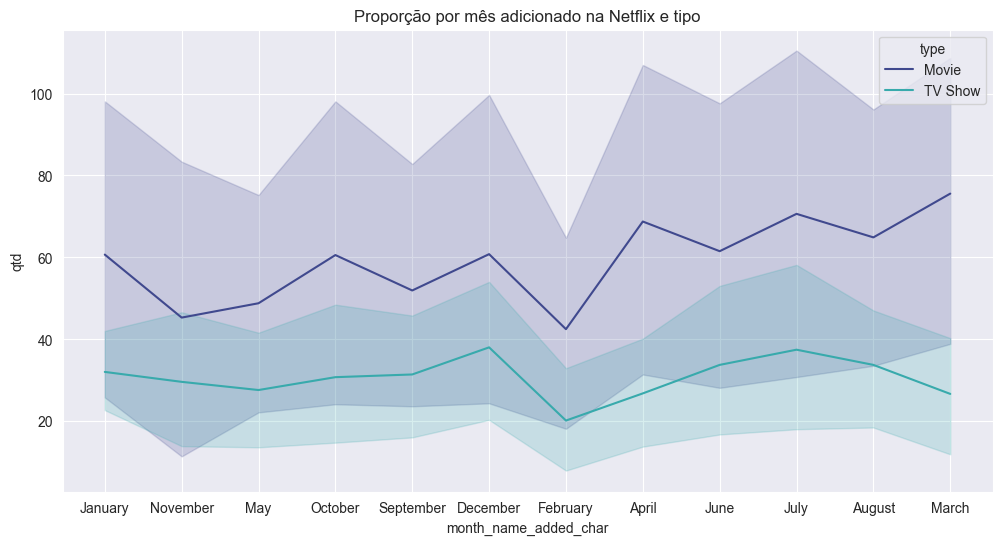

In [218]:
# Proporção por ano, mês adicionado e tipo
plt.figure(figsize=(12,6))
sns.lineplot(data=df_qtd_ano_mes_added, 
            x='month_name_added_char', 
            y='qtd',
            hue='type',
            markers=True, dashes=False, palette="mako")
plt.title("Proporção por mês adicionado na Netflix e tipo")
plt.show()

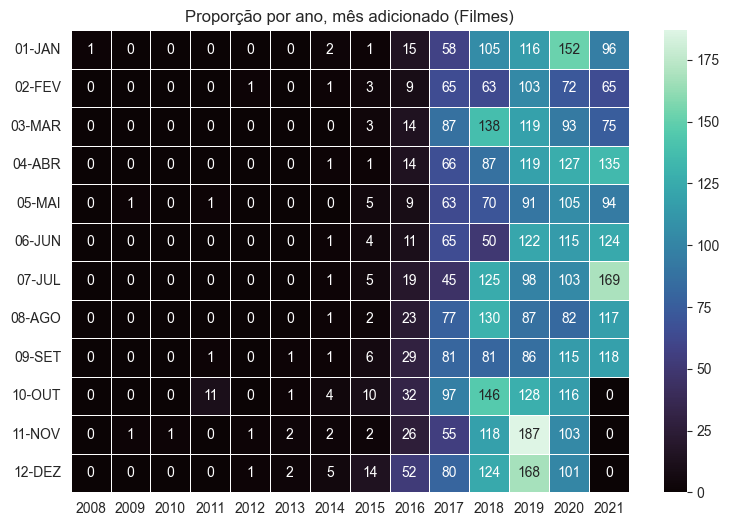

In [219]:
# Proporção por ano, mês adicionado
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(df_qtd_ano_mes_added_filmes, annot=True, fmt="d", linewidths=.5, ax=ax, cmap='mako')
plt.title("Proporção por ano, mês adicionado (Filmes)")
plt.xlabel(None)
plt.ylabel(None)
plt.show()

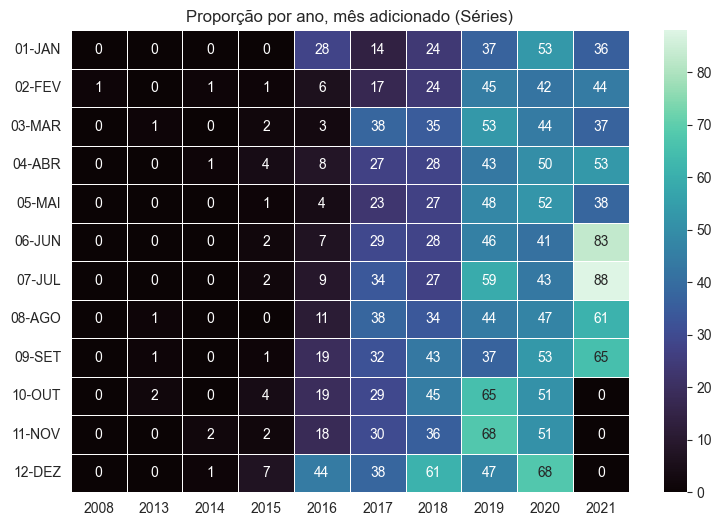

In [220]:
# Proporção por ano, mês adicionado
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(df_qtd_ano_mes_added_series, annot=True, fmt="d", linewidths=.5, ax=ax, cmap='mako')
plt.title("Proporção por ano, mês adicionado (Séries)")
plt.xlabel(None)
plt.ylabel(None)
plt.show()

C:\Users\rafhael.martins\AppData\Local\Temp\ipykernel_2544\709419734.py:7: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

C:\Users\rafhael.martins\Anaconda3\envs\portfolio\lib\site-packages\seaborn\distributions.py:497: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)

C:\Users\rafhael.martins\Anaconda3\envs\portfolio\lib\site-packages\seaborn\distributions.py:498: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)

C:\Users\rafhael.martins\AppData\Local\Temp\ipykernel_2544\709419734.py:12: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

C:\Users\rafhael.martins\Anaconda3\envs\portfolio\lib\site-packages\seaborn\distributions.py:497: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when

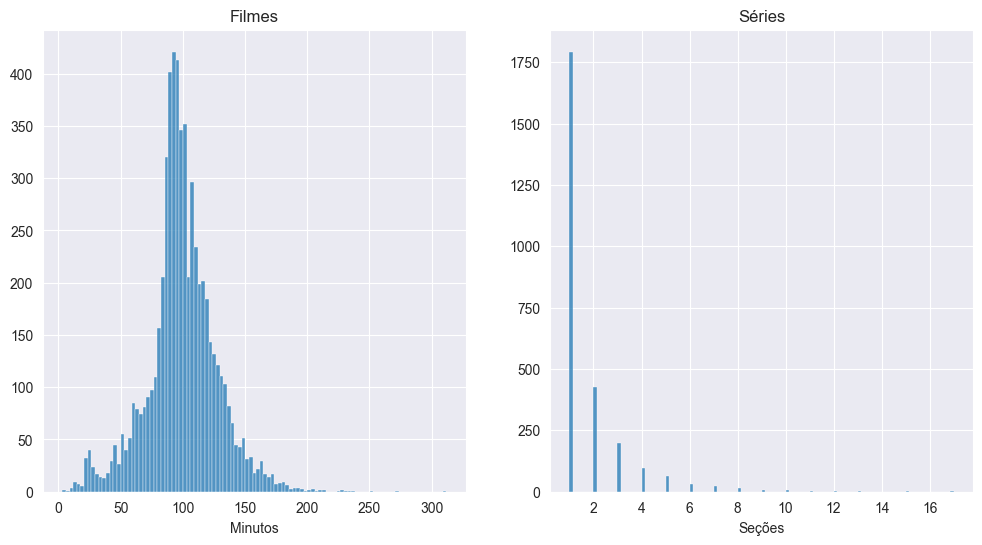

In [222]:
# Qual filme e série possuem maior duração de tempo?
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

filmes = df.loc[df['type'] == 'Movie']
series = df.loc[df['type'] == 'TV Show']

sns.histplot(data=filmes, x='duration_num', ax=ax[0], palette="mako")
ax[0].set_title('Filmes')
ax[0].set_xlabel("Minutos")
ax[0].set_ylabel(None)

sns.histplot(data=series, x='duration_num', ax=ax[1], palette="mako")
ax[1].set_title('Séries')
ax[1].set_xlabel("Seções")
ax[1].set_ylabel(None)

# fig.subtitle("Tempo de duração por tipo")
plt.show()

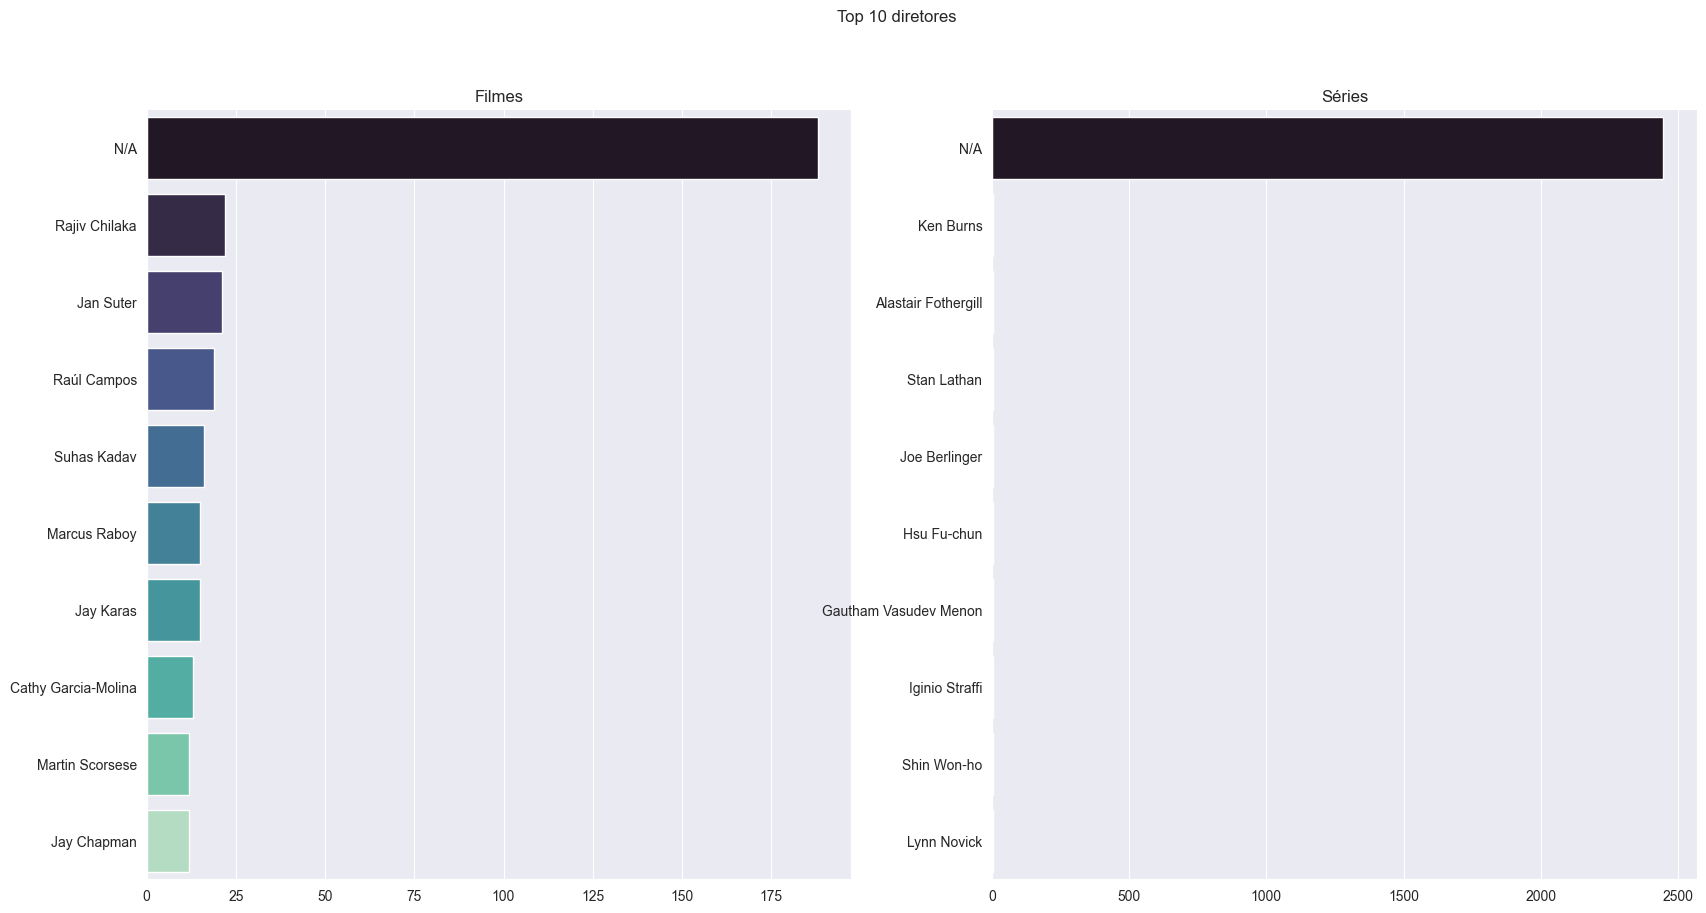

In [224]:
# Top 10 diretores
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(20,10))

sns.barplot(data=df_qtd_diretor.loc[df_qtd_diretor.type == "Movie"][:10], x="qtd", y="diretor", palette="mako", ax=axes[0])
axes[0].set_title('Filmes')
axes[0].set_xlabel(None)
axes[0].set_ylabel(None)

sns.barplot(data=df_qtd_diretor.loc[df_qtd_diretor.type != "Movie"][:10], x="qtd", y="diretor", palette="mako", ax=axes[1])
axes[1].set_title('Séries')
axes[1].set_xlabel(None)
axes[1].set_ylabel(None)

fig.suptitle("Top 10 diretores")
plt.show()

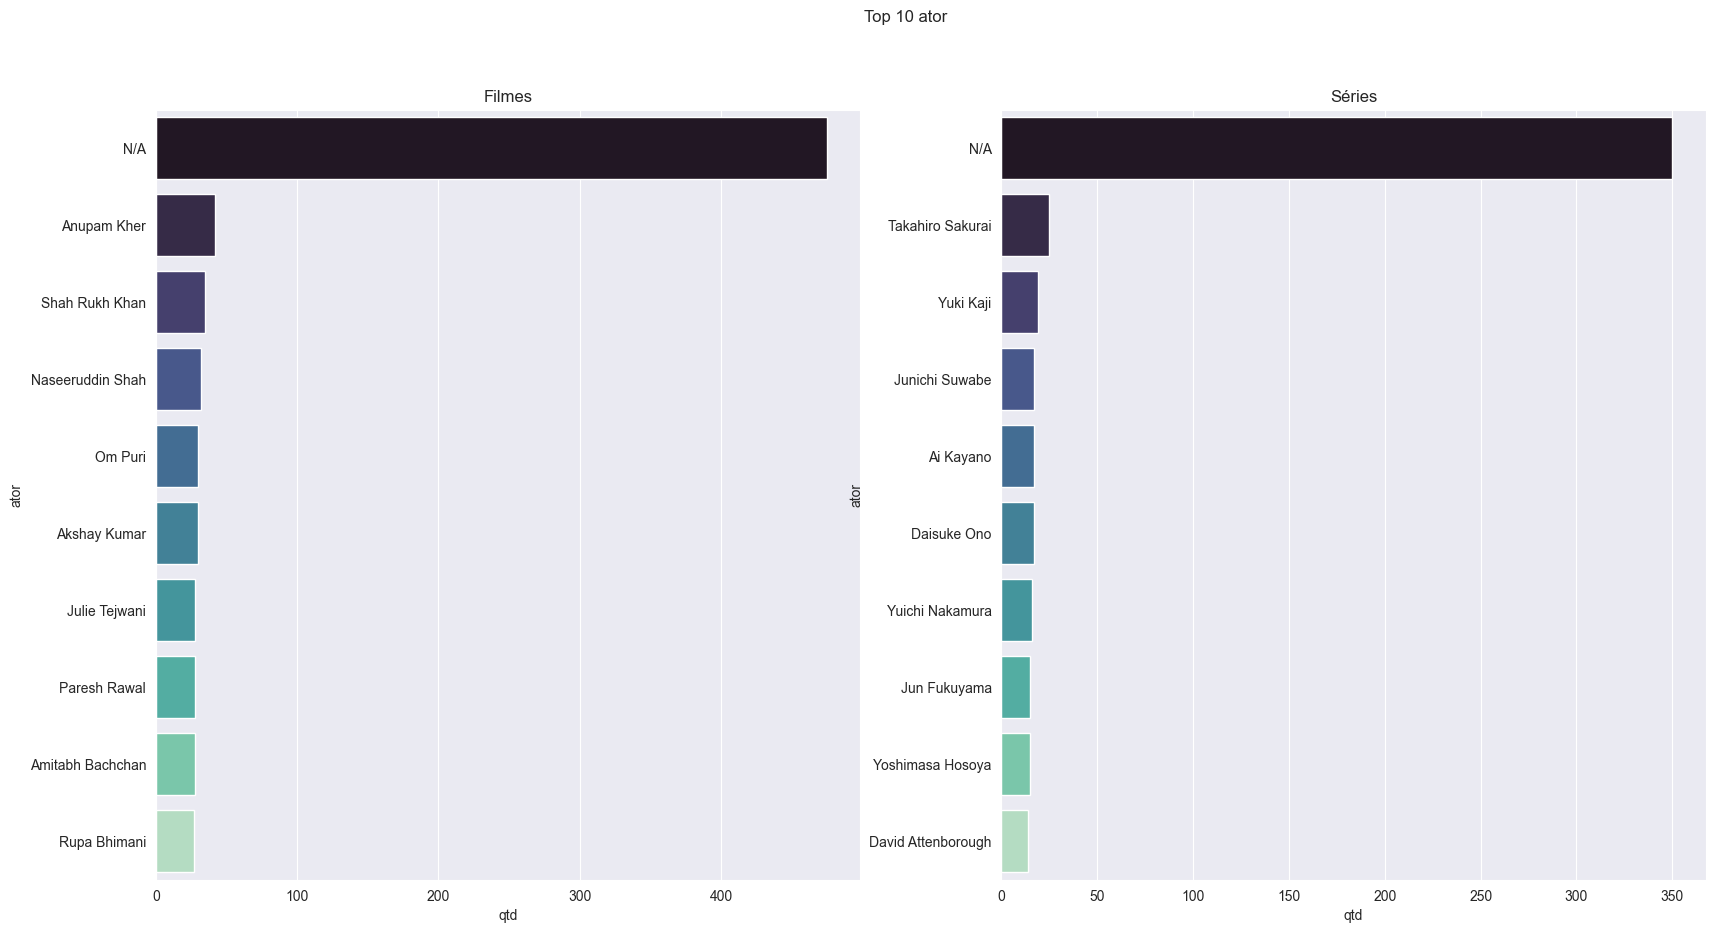

In [225]:
# Top 10 atores
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(20,10))

sns.barplot(data=df_qtd_ator.loc[df_qtd_ator.type == "Movie"][:10], x="qtd", y="ator", palette="mako", ax=axes[0])
axes[0].set_title('Filmes')

sns.barplot(data=df_qtd_ator.loc[df_qtd_ator.type != "Movie"][:10], x="qtd", y="ator", palette="mako", ax=axes[1])
axes[1].set_title('Séries')

fig.suptitle("Top 10 ator")
plt.show()

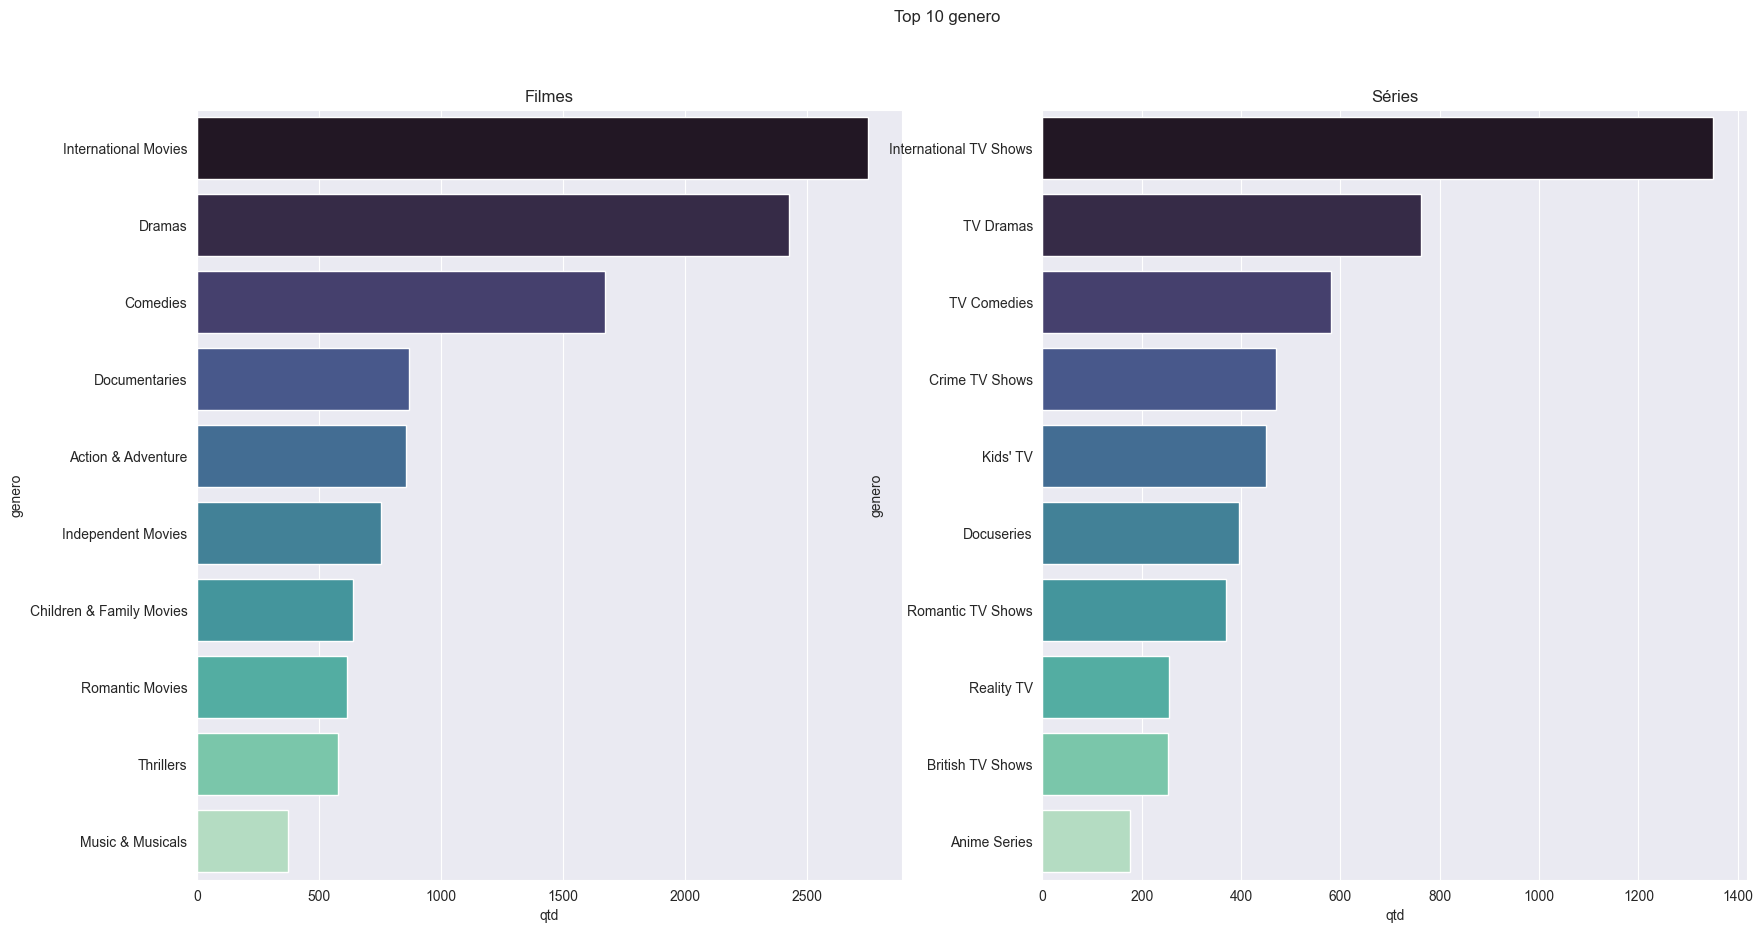

In [226]:
# Top 10 genero
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(20,10))

sns.barplot(data=df_qtd_genero.loc[df_qtd_genero.type == "Movie"][:10], x="qtd", y="genero", palette="mako", ax=axes[0])
axes[0].set_title('Filmes')

sns.barplot(data=df_qtd_genero.loc[df_qtd_genero.type != "Movie"][:10], x="qtd", y="genero", palette="mako", ax=axes[1])
axes[1].set_title('Séries')

fig.suptitle("Top 10 genero")
plt.show()

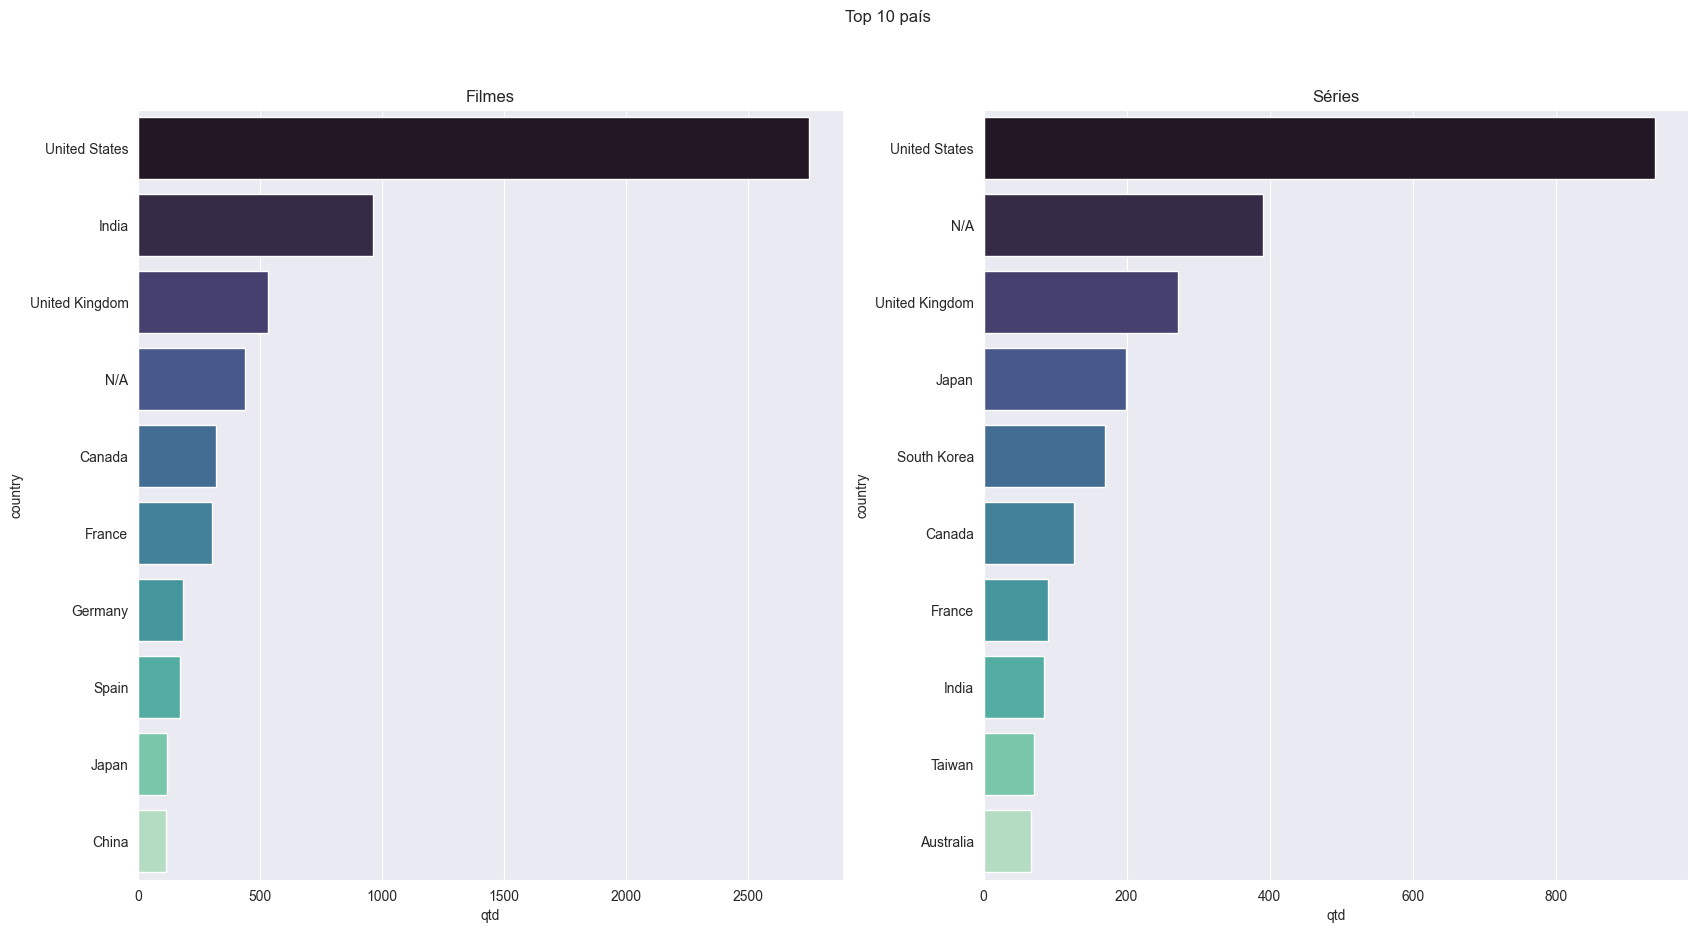

In [227]:
# Top 10 país
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(20,10))

sns.barplot(data=df_qtd_pais.loc[df_qtd_pais.type == "Movie"][:10], x="qtd", y="country", palette="mako", ax=axes[0])
axes[0].set_title('Filmes')

sns.barplot(data=df_qtd_pais.loc[df_qtd_pais.type != "Movie"][:10], x="qtd", y="country", palette="mako", ax=axes[1])
axes[1].set_title('Séries')

fig.suptitle("Top 10 país")
plt.show()

In [109]:
# Cria coluna de classificação indicativa descrição e perfil.
df_qtd_class_ind = df.groupby(by=['type', 'rating', 'rating_profile', 'rating_desc'], as_index=False)['show_id'].count()
df_qtd_class_ind.rename(columns={'show_id':'qtd'}, inplace=True)
df_qtd_class_ind

,type,rating,rating_profile,rating_desc,qtd
0,Movie,G,Kids,Adequado para o público em geral,41
1,Movie,N/A,Sem Informação,Sem Informação,5
2,Movie,NC-17,Adults,Impróprio para menores de 17 anos,3
3,Movie,NR,Adults,Restrito. Pode ser impróprio para menores de 1...,75
4,Movie,PG,Kids,Orientação parental sugerida,287
5,Movie,PG-13,Teens,Pode ser impróprio para menores de 13 anos,490
6,Movie,R,Adults,Restrito. Pode ser impróprio para menores de 1...,797
7,Movie,TV-14,Teens,Não recomendado para menores de 14 anos,1427
8,Movie,TV-G,Kids,Adequado para o público em geral,126
9,Movie,TV-MA,Adults,Não recomendado para menores de 17 anos,2062


In [116]:
df_qtd_class_ind2 = df_qtd_class_ind[["type", "rating_profile", "qtd"]].sort_values(by=['type', 'qtd'], ascending=False, ignore_index=True)

filmes_class_ind = df_qtd_class_ind2.loc[df_qtd_class_ind2['type'] == 'Movie']
series_class_ind = df_qtd_class_ind2.loc[df_qtd_class_ind2['type'] == 'TV Show']

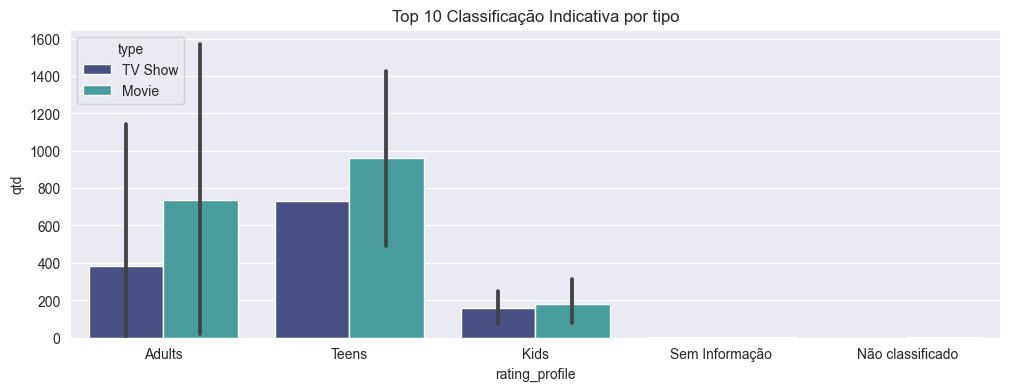

In [228]:
plt.figure(figsize=(12,4))
sns.barplot(data=df_qtd_class_ind2, x="rating_profile", y="qtd", hue='type', palette="mako")
plt.title("Top 10 Classificação Indicativa por tipo")
plt.show()

In [238]:
# Quais são as séries mais atuais e as mais antigas?
# Mais atuais.
df[["title", "year_added_num"]].sort_values(by="year_added_num", ascending=False, ignore_index=True)[:10]

,title,year_added_num
0,Dick Johnson Is Dead,2021
1,HOMUNCULUS,2021
2,Keymon and Nani in Space Adventure,2021
3,Izzy's Koala World,2021
4,Zero,2021
5,Tell Me When,2021
6,Oloibiri,2021
7,Wild Dog,2021
8,Stowaway,2021
9,Searching For Sheela,2021


In [239]:
# Quais são as séries mais atuais e as mais antigas?
# Mais antigas
df[["title", "year_added_num"]].sort_values(by="year_added_num", ascending=True, ignore_index=True)[:10]

,title,year_added_num
0,To and From New York,2008
1,Dinner for Five,2008
2,Just Another Love Story,2009
3,Splatter,2009
4,Mad Ron's Prevues from Hell,2010
5,Victim of Beauty,2011
6,A Stoning in Fulham County,2011
7,Adam: His Song Continues,2011
8,Hard Lessons,2011
9,In Defense of a Married Man,2011


In [230]:
fig = px.choropleth(df_qtd_pais,   #distribution of content on basis of countries
    locationmode='country names',
    #range_color=(0, 3000),
    locations="country",
    labels="type",
    color='qtd',
    color_continuous_scale="Viridis",
    scope=None
)
fig.show()

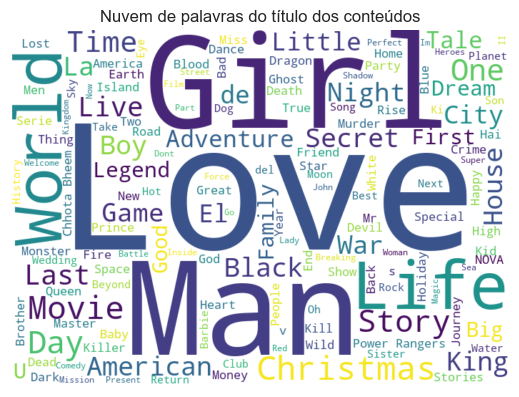

In [173]:
# Preparação da descrição (description) para representação em WordCloud.

mask = np.array(Image.open('imagens/png-transparent-logo-netflix-nasdaq-nflx-brand-television-copywriter-floor-television-text-rectangle.png'))

text = str(list(df['title'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '').replace('.', '')

wordcloud = WordCloud(background_color = 'white', width = 700,  height = 500, max_words = 150).generate(text)

plt.figure( figsize=(5,5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.title("Nuvem de palavras do título dos conteúdos")
plt.show()

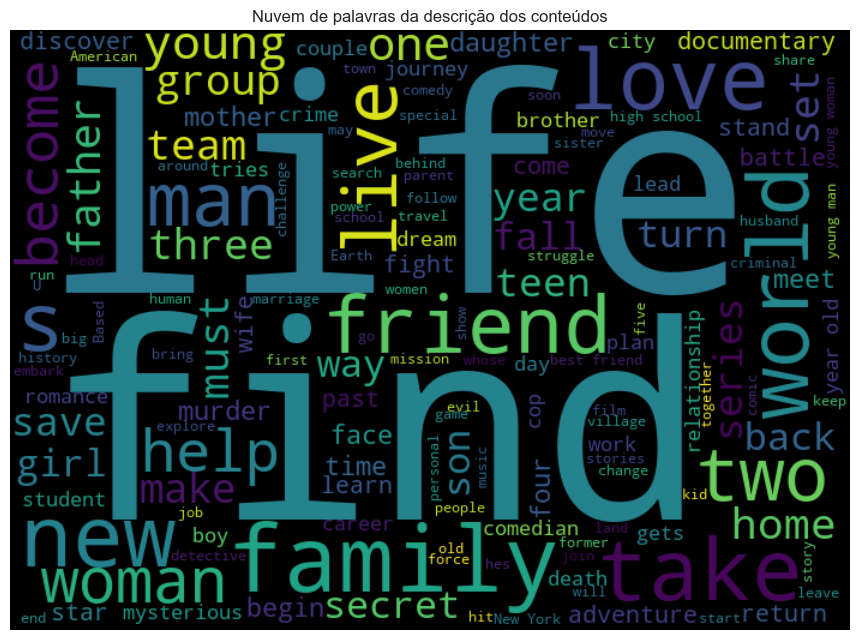

In [172]:
text = str(list(df['description'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '').replace('.', '')

wordcloud = WordCloud(background_color = 'black', width = 700,  height = 500, max_words = 150).generate(text)

plt.figure( figsize=(12,6))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.title("Nuvem de palavras da descrição dos conteúdos")
plt.show()

## Referências
- https://matplotlib.org/2.0.2/users/pyplot_tutorial.html
- https://www.kaggle.com/code/subinium/simple-matplotlib-visualization-tips
- https://medium.com/@bernardolago/gr%C3%A1ficos-usando-seaborn-61f7d23481cf
- https://www.kaggle.com/code/joshuaswords/netflix-data-visualization
- https://www.kaggle.com/datasets/shivamb/netflix-shows
- https://libraries.io/pypi/cutecharts